<a href="https://colab.research.google.com/github/AnusuryaS/Heart-disease-prediction/blob/main/Copy_of_Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import joblib

['.config', 'Heart_Disease_Prediction.csv', 'sample_data']


In [17]:
dataset = pd.read_csv("Heart_Disease_Prediction.csv")

In [18]:
type(dataset)

pandas.core.frame.DataFrame

In [19]:
dataset.shape

(270, 14)

In [20]:
dataset.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [21]:
dataset.sample(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
53,63,0,2,140,195,0,0,179,0,0.0,1,2,3,Absence
93,54,1,4,110,206,0,2,108,1,0.0,2,1,3,Presence
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3,Absence
246,65,1,4,110,248,0,2,158,0,0.6,1,2,6,Presence
113,54,0,3,135,304,1,0,170,0,0.0,1,0,3,Absence
137,56,1,4,125,249,1,2,144,1,1.2,2,1,3,Presence
190,54,1,4,140,239,0,0,160,0,1.2,1,0,3,Absence
191,70,1,4,145,174,0,0,125,1,2.6,3,0,7,Presence
76,45,1,4,104,208,0,2,148,1,3.0,2,0,3,Absence
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7,Presence


In [22]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [65]:
dataset.nunique(axis=0)

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [24]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

Age:			age
Sex:			1: male, 0: female
Chest pain type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
BP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FBS over 120:			fasting blood sugar > 120 mg/dl
EKG results:			resting electrocardiographic results (values 0,1,2)
Max HR:			 maximum heart rate achieved
Exercise angina:			exercise induced angina
ST depression:			oldpeak = ST depression induced by exercise relative to rest
Slope of ST:			the slope of the peak exercise ST segment
Number of vessels fluro:			number of major vessels (0-3) colored by flourosopy
Thallium:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [25]:
dataset["Heart Disease"].describe()

count         270
unique          2
top       Absence
freq          150
Name: Heart Disease, dtype: object

In [26]:
dataset["Heart Disease"].unique()

array(['Presence', 'Absence'], dtype=object)

In [69]:
dataset['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

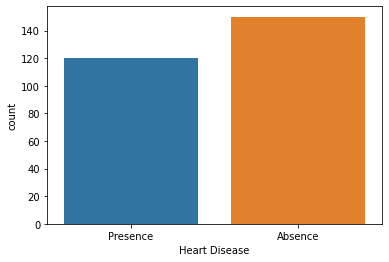

In [27]:
y = dataset["Heart Disease"]

sns.countplot(y)






In [68]:
print(dataset.isna().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [66]:
print("(Rows, columns): " + str(dataset.shape))


(Rows, columns): (270, 14)


In [67]:
dataset.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

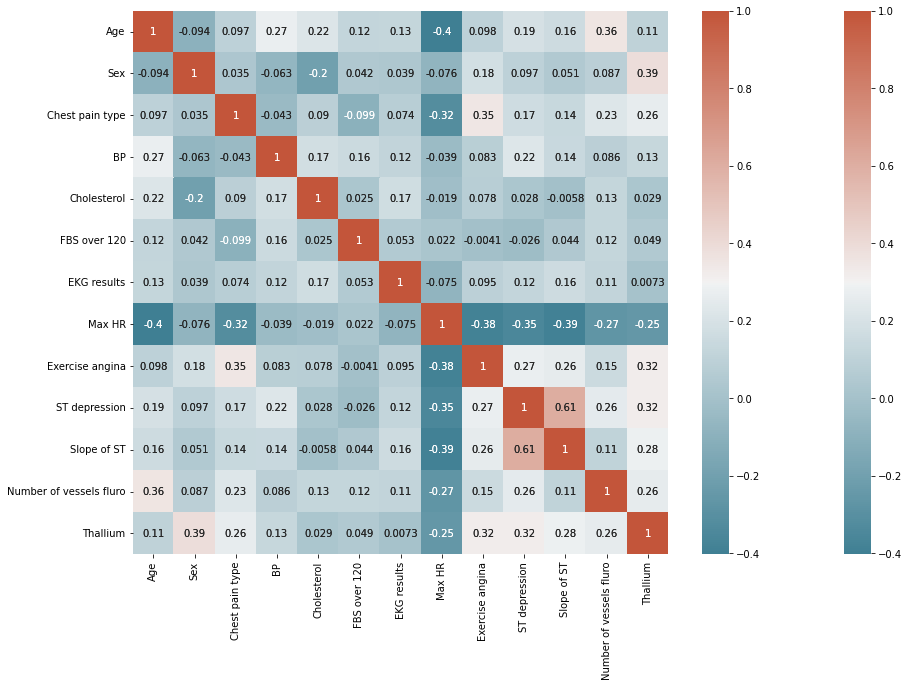

In [70]:
corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

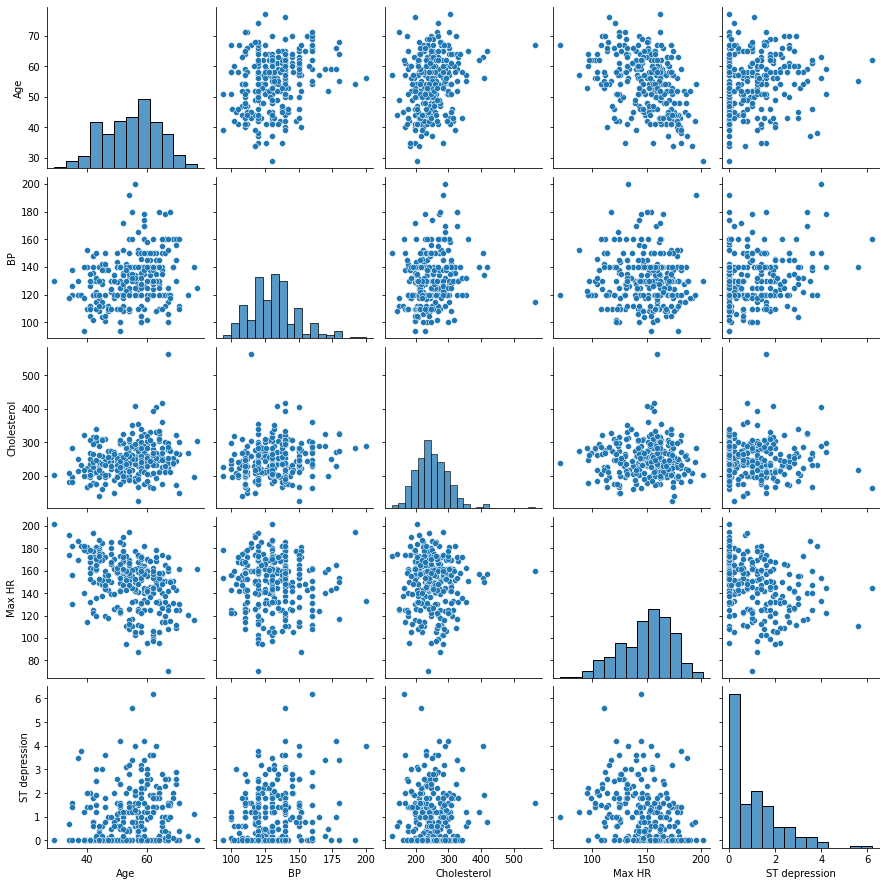

In [71]:
subData = dataset[['Age','BP','Cholesterol','Max HR','ST depression']]
sns.pairplot(subData)

In [81]:
presence=1
pos_dataset = dataset[dataset['Heart Disease']==1]
pos_dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
Absence=0
pos_dataset = dataset[dataset['Heart Disease']==0]
pos_dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
print("(Positive Patients ST depression): " + str(dataset['ST depression'].mean()))
print("(Negative Patients ST depression): " + str(dataset['ST depression'].mean()))

(Positive Patients ST depression): 1.0499999999999996
(Negative Patients ST depression): 1.0499999999999996


In [86]:
print("(Positive Patients Max HR): " + str(dataset['Max HR'].mean()))
print("(Negative Patients Max HR): " + str(dataset['Max HR'].mean()))

(Positive Patients Max HR): 149.67777777777778
(Negative Patients Max HR): 149.67777777777778


In [28]:
dataset["Sex"].unique()

array([1, 0])

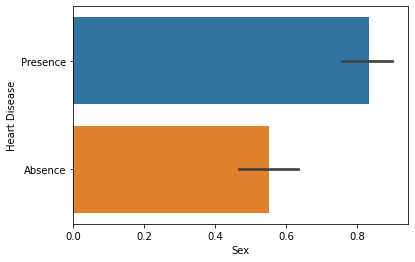

In [29]:
sns.barplot(dataset["Sex"],y)

In [30]:
dataset["Chest pain type"].unique()

array([4, 3, 2, 1])

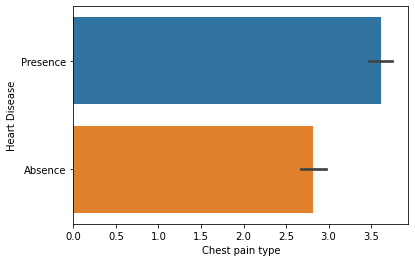

In [31]:
sns.barplot(dataset["Chest pain type"],y)

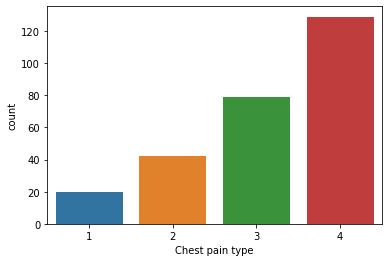

In [32]:
sns.countplot(dataset["Chest pain type"])

In [33]:
dataset["FBS over 120"].describe()

count    270.000000
mean       0.148148
std        0.355906
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FBS over 120, dtype: float64

In [34]:
dataset["FBS over 120"].unique()

array([0, 1])

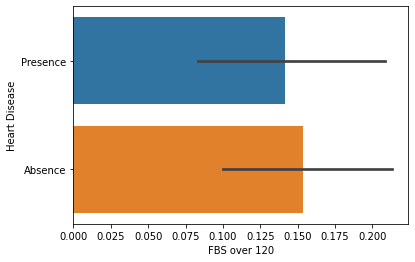

In [35]:
sns.barplot(dataset["FBS over 120"],y)

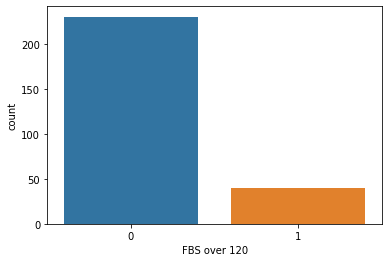

In [36]:
sns.countplot(dataset["FBS over 120"])

In [37]:
dataset["EKG results"].unique()

array([2, 0, 1])

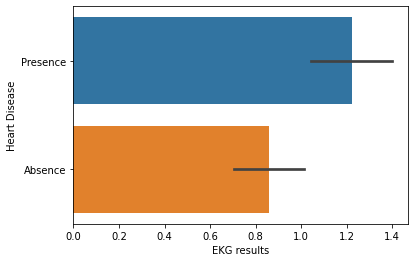

In [38]:
sns.barplot(dataset["EKG results"],y)

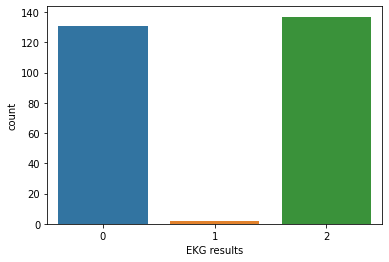

In [39]:
sns.countplot(dataset["EKG results"])

In [40]:
dataset["Exercise angina"].unique()

array([0, 1])

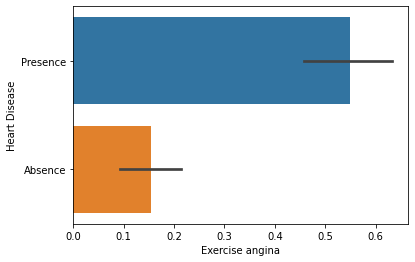

In [41]:
sns.barplot(dataset["Exercise angina"],y)

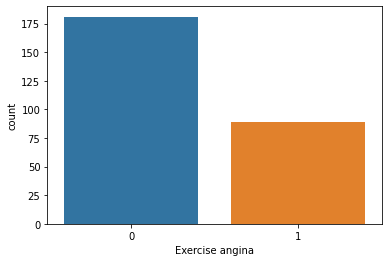

In [42]:
sns.countplot(dataset["Exercise angina"])

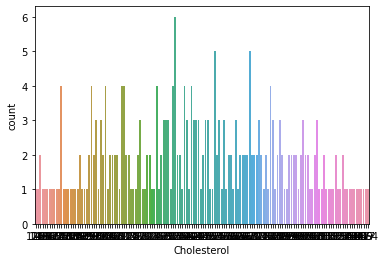

In [43]:
sns.countplot(dataset["Cholesterol"])

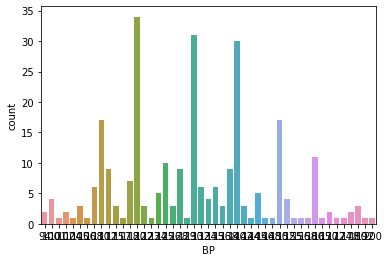

In [44]:
sns.countplot(dataset["BP"])

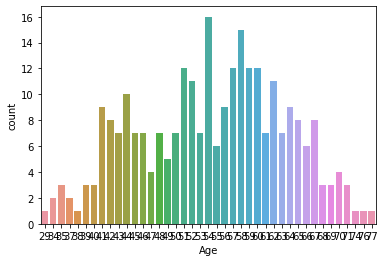

In [45]:
sns.countplot(dataset["Age"])

In [46]:
dataset["Slope of ST"].unique()

array([2, 1, 3])

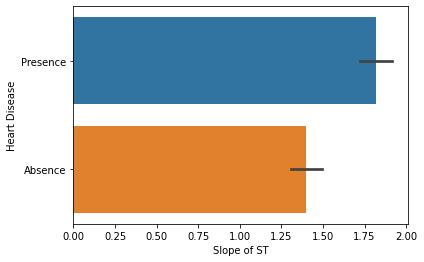

In [47]:
sns.barplot(dataset["Slope of ST"],y)

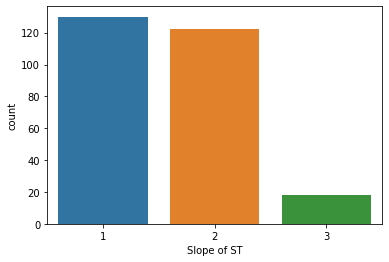

In [48]:
sns.countplot(dataset["Slope of ST"])

In [49]:
dataset["Number of vessels fluro"].unique()

array([3, 0, 1, 2])

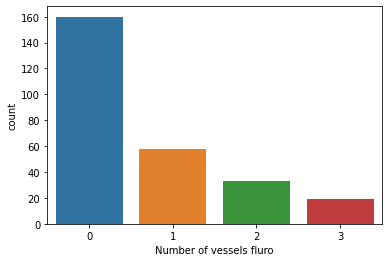

In [50]:
sns.countplot(dataset["Number of vessels fluro"])

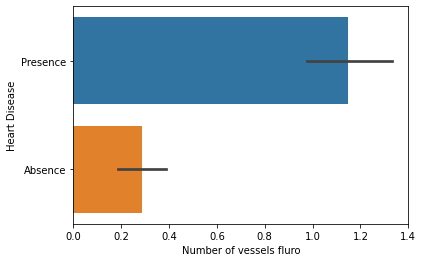

In [51]:
sns.barplot(dataset["Number of vessels fluro"],y)

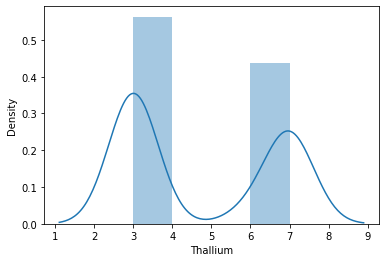

In [52]:
sns.distplot(dataset["Thallium"])

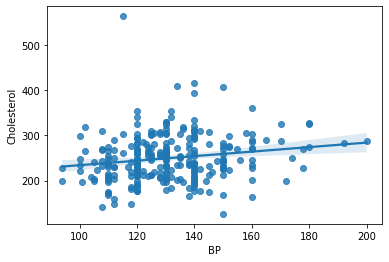

In [53]:


# use the function regplot to make a scatterplot
sns.regplot(x=dataset["BP"], y=dataset["Cholesterol"])

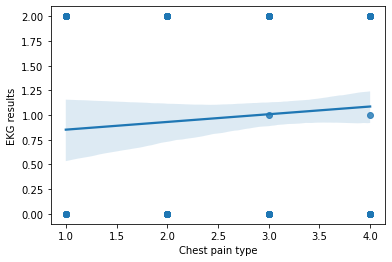

In [54]:
sns.regplot(x=dataset["Chest pain type"], y=dataset["EKG results"])

In [55]:
dataset.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


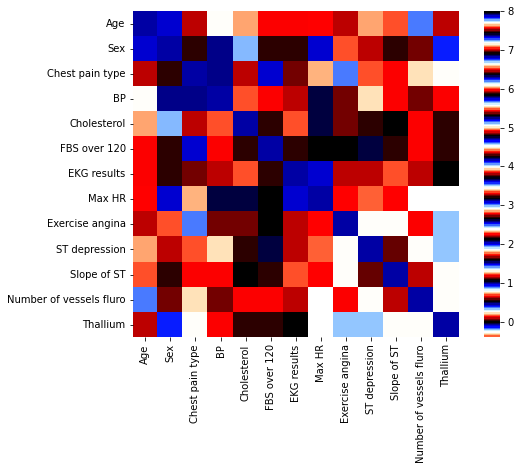

In [56]:
matrix=dataset.corr()
ax=plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax=8, square=True, cmap="flag")

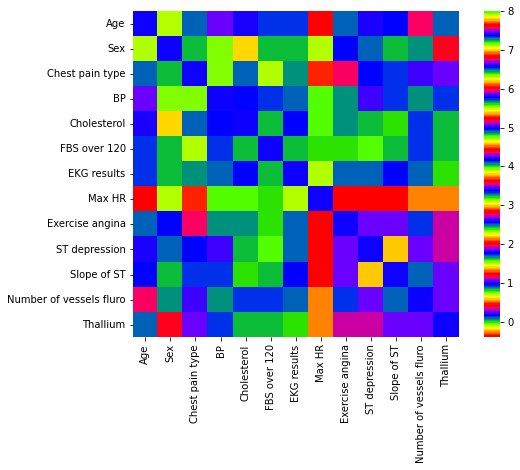

In [57]:
matrix=dataset.corr()
ax=plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax=8, square=True, cmap="prism")

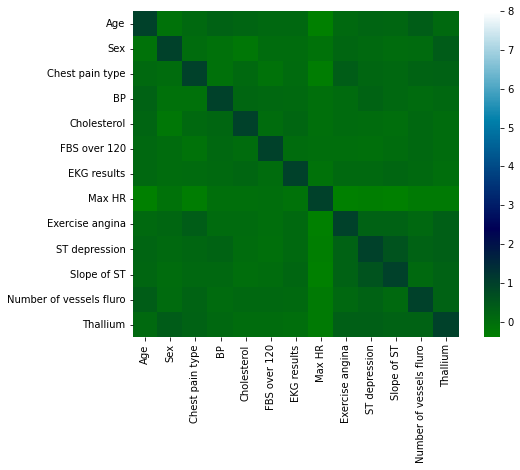

In [58]:
matrix=dataset.corr()
ax=plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax=8, square=True, cmap="ocean")

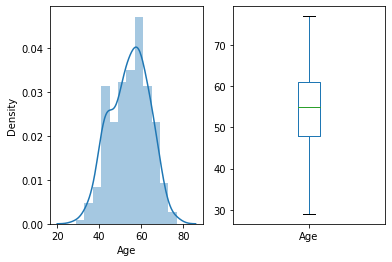

In [59]:
plt.figure(1)
plt.subplot(121), sns.distplot(dataset['Age'])
plt.subplot(122), dataset['Age'].plot.box()
plt.show()

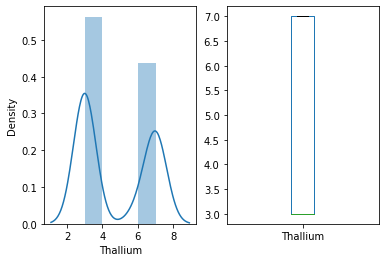

In [60]:
plt.figure(1)
plt.subplot(121), sns.distplot(dataset['Thallium'])
plt.subplot(122), dataset['Thallium'].plot.box()
plt.show()

In [88]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [92]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

     Absence       0.82      0.90      0.86        31
    Presence       0.85      0.74      0.79        23

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.83      0.83      0.83        54



In [93]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

     Absence       0.85      0.90      0.88        31
    Presence       0.86      0.78      0.82        23

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.85        54
weighted avg       0.85      0.85      0.85        54



In [96]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

     Absence       0.84      0.87      0.86        31
    Presence       0.82      0.78      0.80        23

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [97]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

     Absence       0.88      0.90      0.89        31
    Presence       0.86      0.83      0.84        23

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54



In [98]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

     Absence       0.74      0.74      0.74        31
    Presence       0.65      0.65      0.65        23

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.70      0.70      0.70        54



In [99]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

     Absence       0.84      0.84      0.84        31
    Presence       0.78      0.78      0.78        23

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [100]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

     Absence       0.88      0.90      0.89        31
    Presence       0.86      0.83      0.84        23

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54



In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[26  5]
 [ 5 18]]


0.8148148148148148

In [102]:

# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.08244
Feature: 1, Score: 0.02818
Feature: 2, Score: 0.09543
Feature: 3, Score: 0.07937
Feature: 4, Score: 0.08426
Feature: 5, Score: 0.01010
Feature: 6, Score: 0.02554
Feature: 7, Score: 0.11597
Feature: 8, Score: 0.05245
Feature: 9, Score: 0.10446
Feature: 10, Score: 0.04092
Feature: 11, Score: 0.09851
Feature: 12, Score: 0.18238


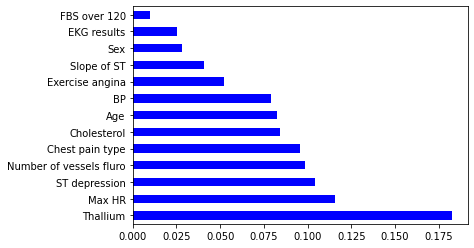

In [103]:
index= dataset.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

In [104]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

['Absence']


In [106]:
print(model6.predict(sc.transform([[80,1,3,220,260,0,2,110,0,2.8,1,3,7]])))

['Presence']


In [105]:
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Presence' 'Presence']
 ['Absence' 'Presence']
 ['Presence' 'Absence']
 ['Absence' 'Presence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Presence' 'Presence']
 ['Presence' 'Presence']
 ['Presence' 'Presence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Presence' 'Presence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Presence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Presence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Presence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Absence' 'Absence']
 ['Presence' 'Presence']
 ['Absence' 'Absence']
 ['Presence' 'Absence']
 

In [134]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Heart Disease",axis=1)
target = dataset["Heart Disease"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape

(216, 13)

In [133]:
Y_test.shape

(54,)

In [132]:
Y_train.shape

(216,)

In [131]:
X_test.shape

(54, 13)

In [135]:
from sklearn.metrics import accuracy_score

In [139]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape


(54,)

In [138]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.33 %


In [142]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape



(54,)

In [141]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 74.07 %


In [143]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape



(54,)

In [144]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 77.78 %


In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape


(54,)

In [146]:

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 62.96 %


In [148]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)



(54,)


In [149]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 85.19 %


In [152]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 77.78 %


In [165]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.33 %
The accuracy score achieved using Naive Bayes is: 74.07 %
The accuracy score achieved using Support Vector Machine is: 77.78 %
The accuracy score achieved using K-Nearest Neighbors is: 62.96 %
The accuracy score achieved using Decision Tree is: 85.19 %
The accuracy score achieved using XGBoost is: 77.78 %


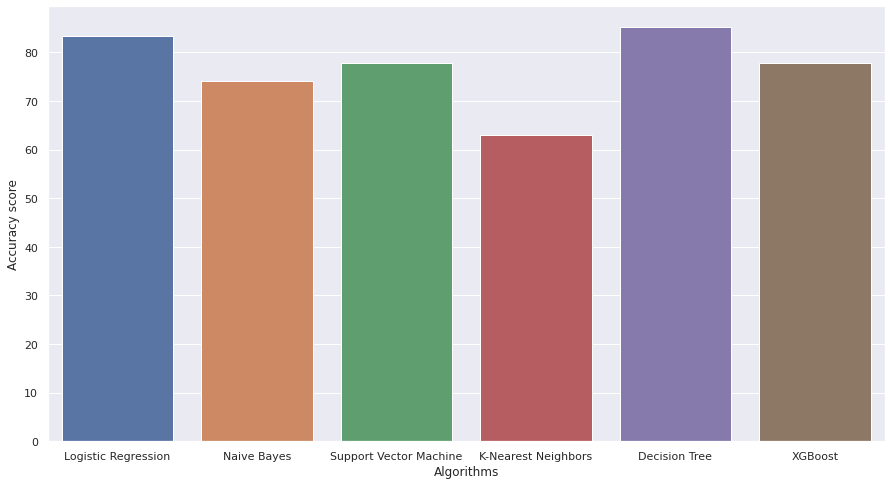

In [166]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)